In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
l = 20
x = np.linspace(0, l*2*np.pi, 1000)
mod = (np.sin(x/10)+1)
y = np.sin(2*mod*x)

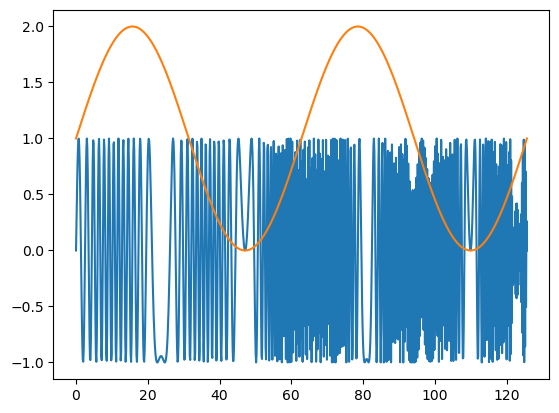

In [30]:
plt.plot(x, y)
plt.plot(x, mod)

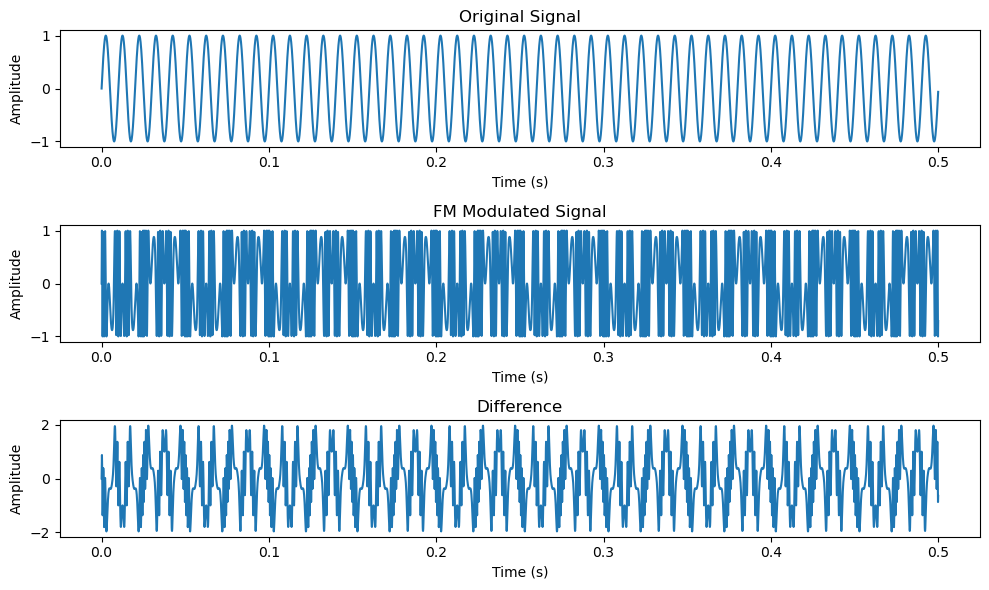

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(duration, sampling_rate, frequency):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = np.sin(2 * np.pi * frequency * t)
    return t, signal

def fm_modulate(signal, modulation_frequency, modulation_index, sampling_rate):
    t = np.arange(0, len(signal) / sampling_rate, 1/sampling_rate)
    modulator = np.sin(2 * np.pi * modulation_frequency * t)
    modulated_signal = np.sin(2 * np.pi * (signal + modulation_index * modulator))
    return modulated_signal

# Parameters
duration = 0.5  # in seconds
sampling_rate = 10000  # in Hz
carrier_frequency = 100  # in Hz
modulation_frequency = 20  # in Hz
modulation_index = 5

# Generate a carrier signal
t, signal = generate_signal(duration, sampling_rate, carrier_frequency)

# Perform frequency modulation
modulated_signal = fm_modulate(signal, modulation_frequency, modulation_index, sampling_rate)

# Plot signals
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, modulated_signal)
plt.title('FM Modulated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, modulated_signal - signal)
plt.title('Difference')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


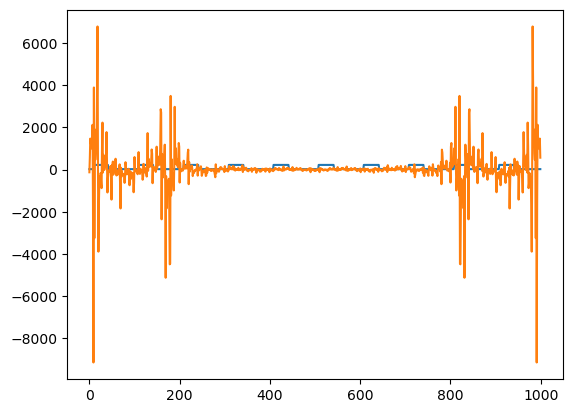

In [101]:
l = 100
x = np.linspace(0, l*2*np.pi, 1000)
mod = (np.sin(x/10) > 0.5) + 0.1
y = np.linspace(0, l, 1000)[::-1]*np.sin(mod.cumsum())
#plt.plot(y)
plt.plot(mod*200)
plt.plot(np.fft.fft(y.real))

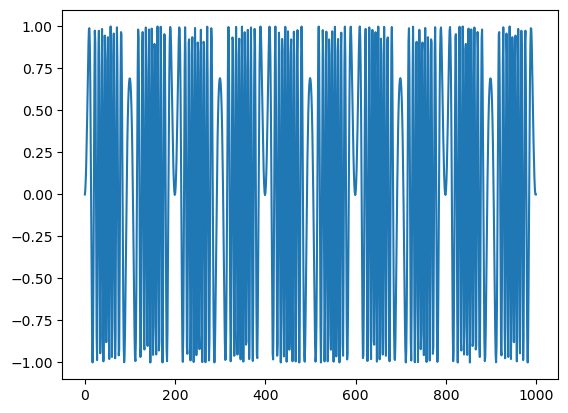

In [81]:
for i in range(3):
    l = 10**(i+2)
    x = np.linspace(0, l*2*np.pi, 1000)
    mod = np.sin(x/20)
    y = np.sin(mod.cumsum())
    plt.plot(y)
    #plt.plot(np.fft.fft(y.real)+i*100)
    break

In [103]:
y.imag

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

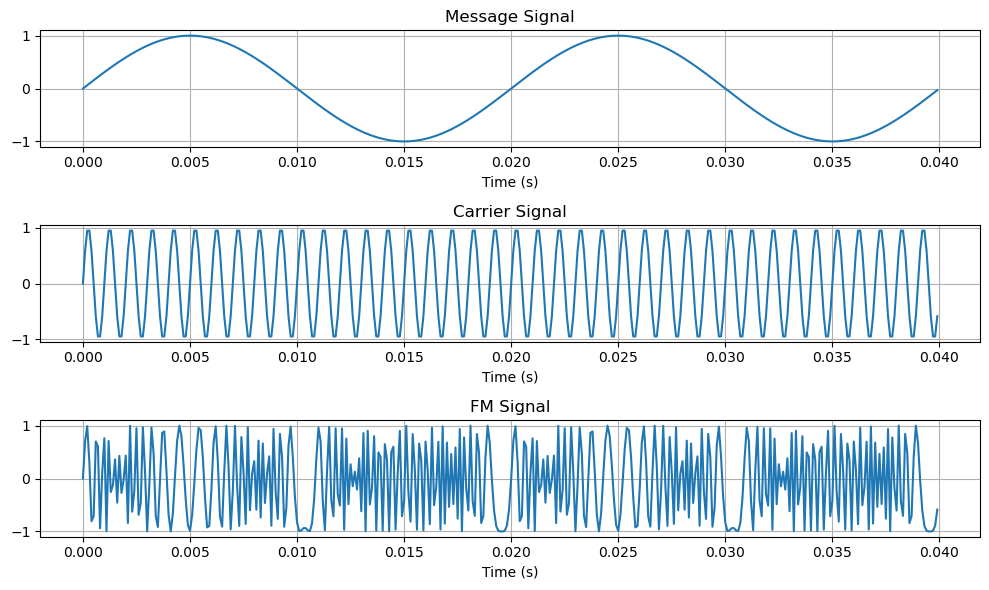

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 10000  # Sampling rate in Hz
duration = 0.04  # Duration of the signal in seconds
carrier_frequency = 1000  # Frequency of the carrier signal in Hz
modulation_index = 5  # Modulation index

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Message signal (modulating signal)
message_signal = np.sin(2 * np.pi * 50 * t)  # For example, a 50 Hz sine wave
integrated_message_signal = np.cumsum(message_signal) #/ sampling_rate  # Integration

# Carrier signal
carrier_signal = np.sin(2 * np.pi * carrier_frequency * t)

# Frequency modulation
fm_signal = np.sin(2 * np.pi * carrier_frequency * t + modulation_index * integrated_message_signal)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, message_signal)
plt.title('Message Signal')
plt.xlabel('Time (s)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal)
plt.title('Carrier Signal')
plt.xlabel('Time (s)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, fm_signal)
plt.title('FM Signal')
plt.xlabel('Time (s)')
plt.grid(True)

plt.tight_layout()
plt.show()
